In [ ]:
Plotting a station choropleth over a region choropleth

In [2]:
import geopandas as gpd
import pandas as pd
import contextily as ctx
import matplotlib.pyplot as plt

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [3]:
gdf = gpd.read_file('stn_reg_dropna.geojson')

In [12]:
list(gdf['% Change Foreign Born'])

[-5.5694406194697175,
 -4.277400569577999,
 -0.8808613558808853,
 -10.516912806672652,
 2.453619491342429,
 -3.622162288535252,
 -2.2896514853121888,
 -0.8861909595789863,
 -6.164557689859251,
 -0.3415754081779132,
 -8.7530822571036,
 -1.0271590648890605,
 -4.0439641914684685,
 -6.878426769290208,
 -11.238443466386205,
 -8.189194278130923,
 -15.220711412239208,
 -9.684103458297011,
 -10.857844184946986,
 -3.6588240662535743,
 -0.893020474377082,
 -8.88951203648529,
 -5.323940092620716,
 -11.63872790345028,
 -12.169810681781678,
 -11.876629478816803,
 -4.948667458063527,
 0.22306780019955008,
 -4.559352097884462,
 -13.512801349124215,
 -8.479533652377564,
 -11.080917524093897,
 -4.162350602558601,
 -1.410156547553948,
 -2.872164147696732,
 -7.2110629213681054,
 -13.048409702235553,
 -12.777058371366657,
 -18.172199530367866,
 -1.5025396108776734,
 0.4653178640732558,
 -5.326062081757554,
 -7.298001547377487,
 1.6604081930056025,
 2.392743812586795,
 -1.7818974095143714,
 -6.541917351111

In [61]:
gdf.tail(10)

,FIPS,Census Tract,11 Total Population,11 Total Foreign Born,11 Total Entered 2000 or later,11 Europe,11 Europe Entered 2000 or later,11 Asia,11 Asia Entered 2000 or later,11 Latin America,...,19 Other Central America,19 Other Central America Entered 2010 or later,19 South America,19 South America Entered 2010 or later,19 Other Areas,19 Other Areas Entered 2010 or later,% Change Foreign Born,region,station,geometry
202,06037531702,"Census Tract 5317.02, Los Angeles, CA",4345.0,1816.0,460.0,0.0,0.0,0.0,0.0,1816.0,...,308.0,0.0,4.0,0.0,0.0,0.0,2.248994,Central East LA,None,"MULTIPOLYGON (((-118.16582 34.01427, -118.1656..."
203,06037531800,"Census Tract 5318, Los Angeles, CA",4705.0,2070.0,474.0,27.0,0.0,27.0,0.0,2016.0,...,228.0,0.0,2.0,0.0,0.0,0.0,2.899412,Central East LA,None,"MULTIPOLYGON (((-118.14624 34.01808, -118.1460..."
204,06037531901,"Census Tract 5319.01, Los Angeles, CA",6380.0,2643.0,426.0,18.0,0.0,13.0,0.0,2612.0,...,131.0,0.0,18.0,0.0,0.0,0.0,2.312645,Central East LA,None,"MULTIPOLYGON (((-118.14742 34.01093, -118.1472..."
205,06037531902,"Census Tract 5319.02, Los Angeles, CA",4194.0,1575.0,141.0,0.0,0.0,4.0,0.0,1571.0,...,24.0,0.0,14.0,0.0,15.0,0.0,7.124076,Central East LA,None,"MULTIPOLYGON (((-118.13788 34.00943, -118.1378..."
206,06037532001,"Census Tract 5320.01, Los Angeles, CA",3350.0,1408.0,229.0,0.0,0.0,46.0,17.0,1319.0,...,189.0,0.0,26.0,18.0,7.0,0.0,-6.720233,East LA,None,"MULTIPOLYGON (((-118.12978 34.00248, -118.1297..."
207,06037532002,"Census Tract 5320.02, Los Angeles, CA",3335.0,1618.0,274.0,15.0,0.0,40.0,5.0,1563.0,...,95.0,28.0,12.0,0.0,5.0,0.0,-9.825266,East LA,None,"MULTIPOLYGON (((-118.12372 33.99695, -118.1233..."
208,06037532101,"Census Tract 5321.01, Los Angeles, CA",6273.0,2376.0,431.0,2.0,0.0,187.0,106.0,2187.0,...,165.0,8.0,61.0,0.0,0.0,0.0,2.333850,East LA,None,"MULTIPOLYGON (((-118.11437 34.00354, -118.1142..."
209,06037532102,"Census Tract 5321.02, Los Angeles, CA",3396.0,1212.0,147.0,28.0,0.0,111.0,10.0,1073.0,...,213.0,44.0,83.0,0.0,0.0,0.0,-3.524412,East LA,None,"MULTIPOLYGON (((-118.11897 33.99571, -118.1180..."
210,06037532200,"Census Tract 5322, Los Angeles, CA",7113.0,2324.0,438.0,23.0,0.0,81.0,1.0,2220.0,...,869.0,225.0,114.0,49.0,0.0,0.0,8.560622,East LA,None,"MULTIPOLYGON (((-118.13422 33.98566, -118.1340..."
211,06037980010,"Census Tract 9800.10, Los Angeles, CA",184.0,61.0,6.0,9.0,0.0,38.0,1.0,12.0,...,0.0,0.0,1.0,1.0,0.0,0.0,13.163616,Central LA,None,"MULTIPOLYGON (((-118.25165 34.08038, -118.2515..."


In [17]:
gdf_web_mercator = gdf.to_crs(epsg=3857)

In [51]:
def stn_map(region = 'San Gabriel Valley', column = '% Change Foreign Born'):
    
    #this region
    this_region = gdf_web_mercator[gdf_web_mercator['region']==region]
                
    # plot it
    fig,ax = plt.subplots(figsize=(15, 15))
                
    this_region.plot(ax=ax,
                column=column, 
                vmin=-25,
                vmax=25,
                alpha=0.8,
                cmap="RdBu",
                legend=True)
    

#Updating the code so that the loop incorporates the correct station name into the title
    ax.axis('off')
    ax.set_title(region + ' % Change in Foreign Born Population', fontsize=17)
    
    ctx.add_basemap(ax,source=ctx.providers.CartoDB.Voyager)

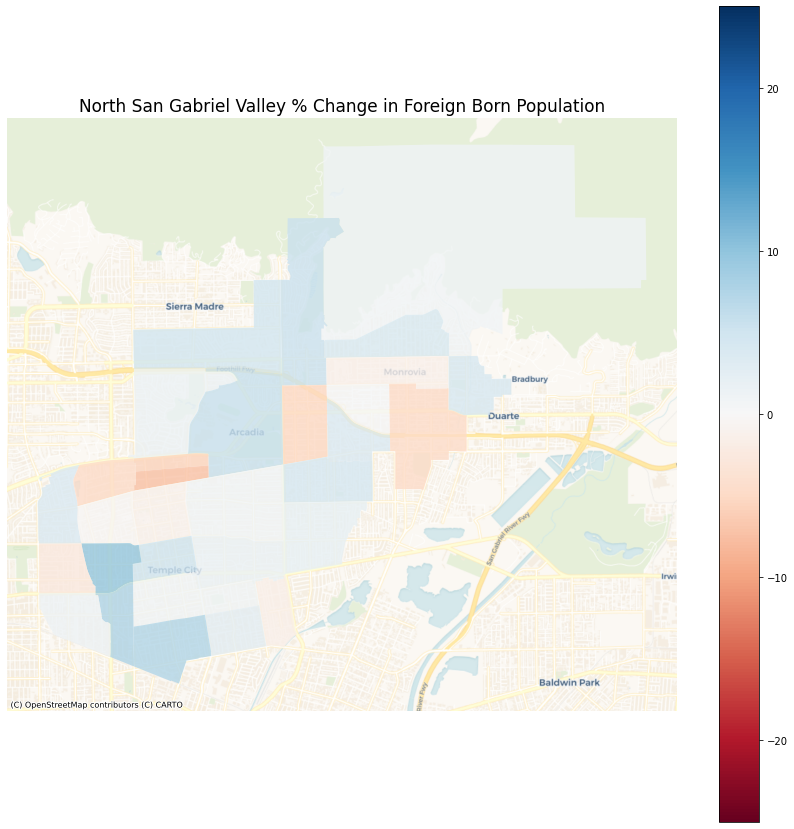

In [46]:
stn_map()

plt.savefig("NSGV_ForeignBorn.jpg")

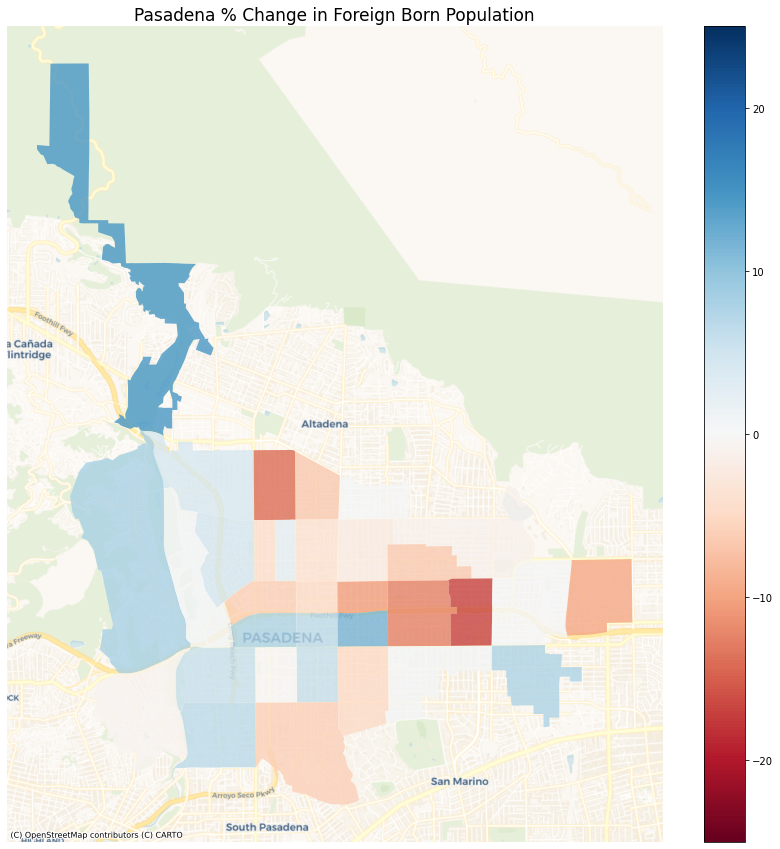

In [53]:
stn_map(region='Pasadena')

plt.savefig("Pasadena_ForeignBorn.jpg")

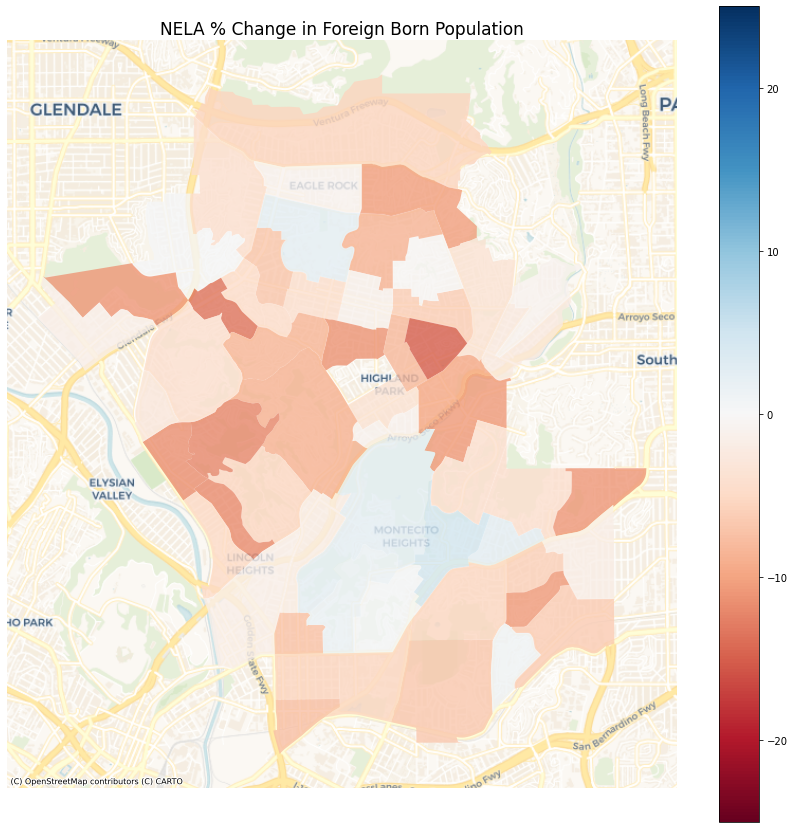

In [55]:
stn_map(region='NELA')

plt.savefig("NELA_ForeignBorn.jpg")

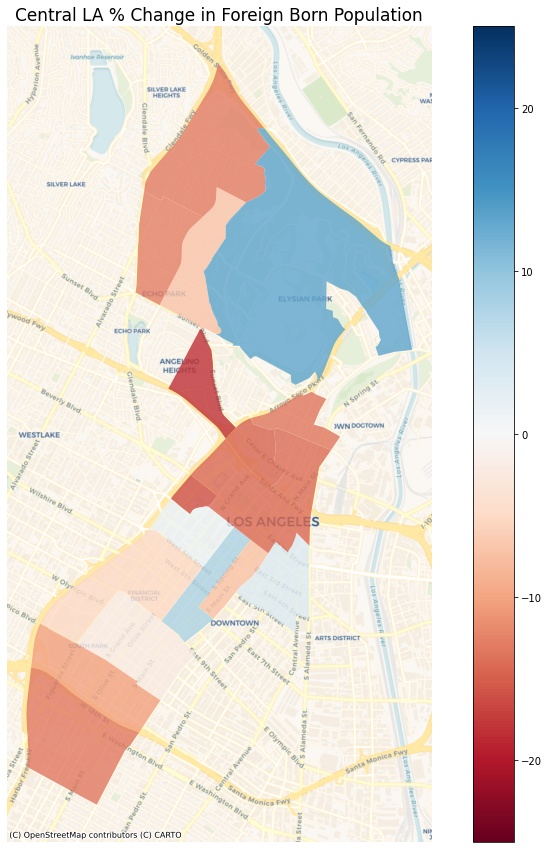

In [57]:
stn_map(region='Central LA')

plt.savefig("Central_LA_ForeignBorn.jpg")

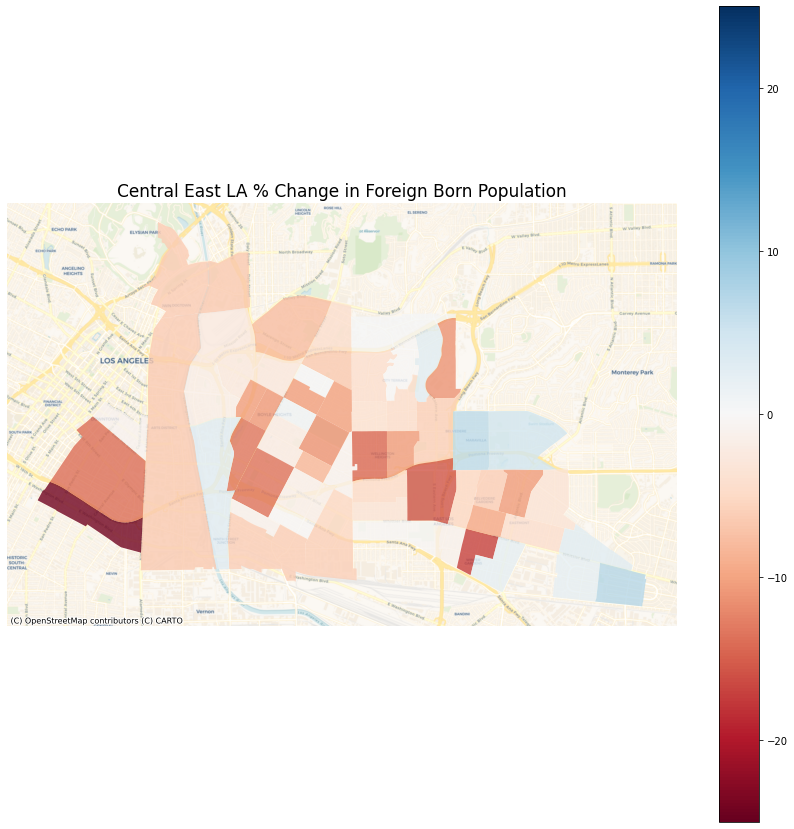

In [59]:
stn_map(region='Central East LA')

plt.savefig("Central_East_LA_ForeignBorn.jpg")

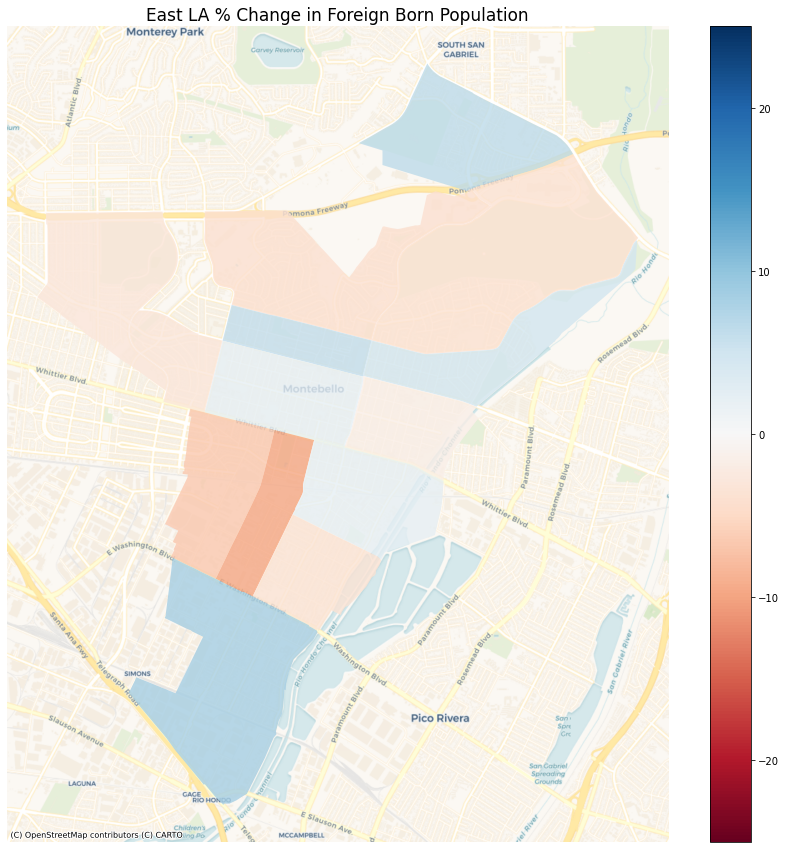

In [63]:
stn_map(region='East LA')

plt.savefig("East_LA_ForeignBorn.jpg")